In [ ]:
import numpy as np
from scipy.special import softmax
import seaborn as sns
import matplotlib.pyplot as plt

# Making of a game ⚔

In [ ]:
def plot_losses(losses):
  plt.figure(figsize=(16,4))
  times = np.arange(0, num_rounds)
  sns.heatmap(losses, cmap="YlGnBu")
  plt.xlabel('Experts')
  plt.ylabel('Time')
  plt.title('Loss of experts over rounds')  

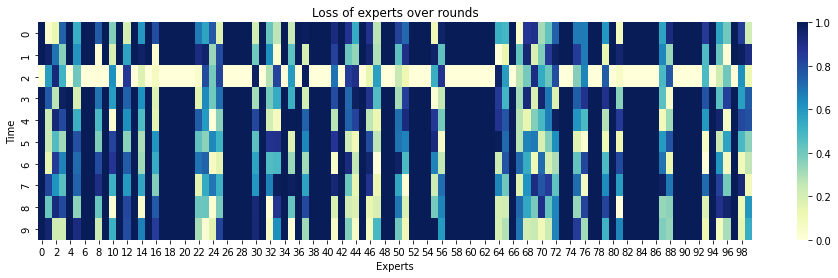

In [ ]:
# Setup the game
num_experts = 10
num_rounds = 100

best_expert = np.random.randint(num_experts)
losses_zero_one = np.ones((num_experts, num_rounds))
losses_zero_one[best_expert, :] = 0
losses_random = np.random.rand(num_experts, num_rounds)

p_random = 0.4
choose_random = np.random.choice(a=[True, False], size=num_rounds, p=[p_random, 1-p_random])

losses = losses_random * choose_random + losses_zero_one * ~choose_random
plot_losses(losses)

# Follow the leader

In [ ]:
# Follow the leader
class FTL:
  def __init__(self, num_experts):
    self.cumulative_losses = np.zeros(num_experts)

  def predict(self, t):
    return np.argmin(self.cumulative_losses)
  
  def update(self, loss, t):
    self.cumulative_losses = self.cumulative_losses + loss

In [ ]:
def play_game(learner, losses, num_rounds):
  predicted_experts = np.zeros(num_rounds, dtype=int)
  for t in range(0, num_rounds):
    # Make a prediction
    expert_t = learner.predict(t)
    # Receive a loss
    loss_t = losses[:, t]
    # Update learener
    learner.update(loss_t, t)
    # Log predictions
    predicted_experts[t] = expert_t

  # Compute regret
  best_expert = np.argmin(losses.sum(axis=1), axis=0)
  times = np.arange(0, num_rounds)
  regret_per_timestep = losses[predicted_experts, times] - losses[best_expert, :]
  total_regret = np.cumsum(regret_per_timestep)
  average_regret = total_regret / (times + 1)
  return predicted_experts, average_regret, total_regret

In [ ]:
def plot_average_regret(average_regret):
  plt.plot(average_regret)
  plt.axhline(linewidth=2, color='tab:orange') 
  plt.xlabel('Time')
  plt.ylabel('Avg Regret')

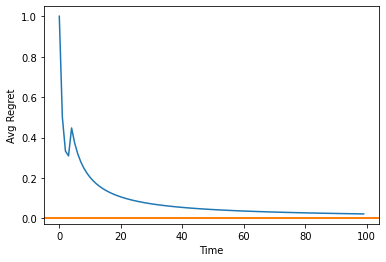

In [ ]:
learner = FTL(num_experts)
predicted_experts, average_regret, _ = play_game(learner, losses, num_rounds)
plot_average_regret(average_regret)

#sns.lineplot(average_regret)
# TODO plot loss heatmap and annotate predicted expert (to show stability)



In [ ]:
# Generalized weighted majority
class GWM:
  def __init__(self, num_experts, eta):
    self.cumulative_losses = np.zeros(num_experts)
    self.eta = eta

  def predict(self, t):
    pvals = softmax(-self.eta * self.cumulative_losses)
    return np.random.multinomial(n=1, pvals=pvals).argmax()
  
  def update(self, loss, t):
    self.cumulative_losses = self.cumulative_losses + loss

In [ ]:
def plot_predicted_expert(predicted_expert, losses):
  plt.figure(figsize=(16,4))
  annot = np.array(['', '✗'])
  predicted_expert_onehot = np.zeros((num_experts, num_rounds), dtype='int')
  times = np.arange(0, num_rounds)
  predicted_expert_onehot[predicted_experts, times] = 1
  sns.heatmap(losses, cmap="YlGnBu", annot=annot[predicted_expert_onehot], fmt='', annot_kws={'color':'tab:red'})

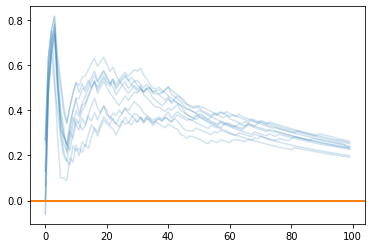

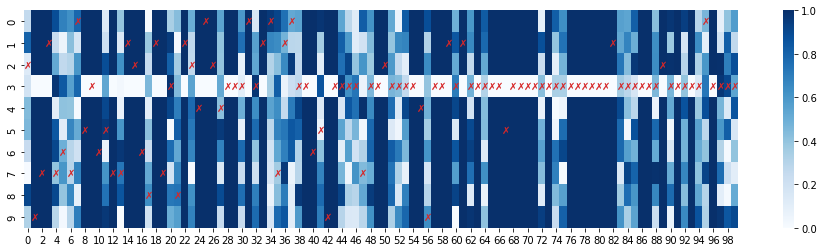

In [ ]:
# Multiple runs for GWM
num_trial = 10
for trial in range(num_trial):
  learner = GWM(num_experts, 0.1)
  predicted_experts, average_regret, _ = play_game(learner, losses, num_rounds)
  plt.plot(average_regret, c='tab:blue', alpha=0.2)
plt.axhline(linewidth=2, color='tab:orange') #adds thick red line @ y=0

plt.figure(figsize=(16,4))
annot = np.array(['', '✗'])
predicted_expert_onehot = np.zeros((num_experts, num_rounds), dtype='int')
times = np.arange(0, num_rounds)
predicted_expert_onehot[predicted_experts, times] = 1
sns.heatmap(losses, cmap="Blues", annot=annot[predicted_expert_onehot], fmt='', annot_kws={'color':'tab:red'})

[0 1 2 3 4 5 6 7 8 9 0 1 2 3 4 5 6 7 8 9 0 1 2 3 4 5 6 7 8 9 0 1 2 3 4 5 6
 7 8 9 0 1 2 3 4 5 6 7 8 9 0 1 2 3 4 5 6 7 8 9 0 1 2 3 4 5 6 7 8 9 0 1 2 3
 4 5 6 7 8 9 0 1 2 3 4 5 6 7 8 9 0 1 2 3 4 5 6 7 8 9]
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1.]
[1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.
 0. 0. 0. 0.]
1.0


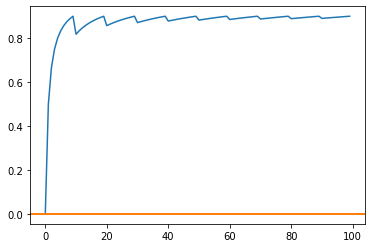

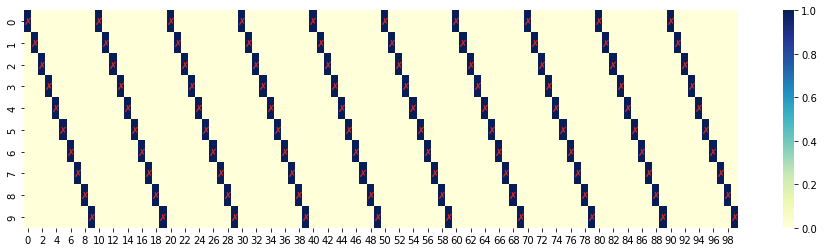

In [ ]:
# Now make an adversarial loss matrix
losses = np.tile(np.diag(np.ones(num_experts)), int(num_rounds/num_experts))

learner = FTL(num_experts)
#learner = GWM(num_experts, 1)
predicted_experts, average_regret, _ = play_game(learner, losses, num_rounds)
plt.plot(average_regret)
plt.axhline(linewidth=2, color='tab:orange') #adds thick red line @ y=0


plt.figure(figsize=(16,4))
annot = np.array(['', '✗'])
predicted_expert_onehot = np.zeros((num_experts, num_rounds), dtype='int')
times = np.arange(0, num_rounds)
predicted_expert_onehot[predicted_experts, times] = 1
sns.heatmap(losses, cmap="YlGnBu", annot=annot[predicted_expert_onehot], fmt='', annot_kws={'color':'tab:red'})


In [ ]:
predicted_experts

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1,
       2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3,
       4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 5,
       6, 7, 8, 9, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 5, 6, 7,
       8, 9, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [ ]:
losses[0,:]

array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.])